Getting datasets list: 100%|██████████| 214/214 [00:00<00:00, 527.42it/s]
!!! Token missing, please check your keys on api.insee.fr
SDMX web service used instead of API
1/1 - Getting series: 100%|██████████| 101/101 [00:00<00:00, 142.14it/s]
Data has been cached



<AxesSubplot:>

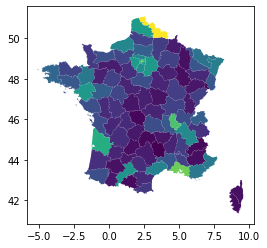

In [1]:
from pynsee.local import get_map
from pynsee.macro import *
import geopandas as gpd
import pandas as pd
import matplotlib
import descartes

map_file = get_map('departements')
map = gpd.read_file(map_file)

dataset_list = get_dataset_list()

id = get_idbank_list("TCRED-ESTIMATIONS-POPULATION") 

id = id.loc[(id.AGE == "00-") &
            (id.SEXE == "0") &
            (id.REF_AREA.str.match("^D"))]

data = get_insee_idbank(id.idbank, lastNObservations=1)
data = data[['REF_AREA', 'OBS_VALUE']]

map['REF_AREA'] = 'D' + map['code']
map_plot = map.merge(data, how = 'left', on = 'REF_AREA')

map_plot.plot(column='OBS_VALUE')
